In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Exercises

***Run ggplot(data = mpg). What do you see?***

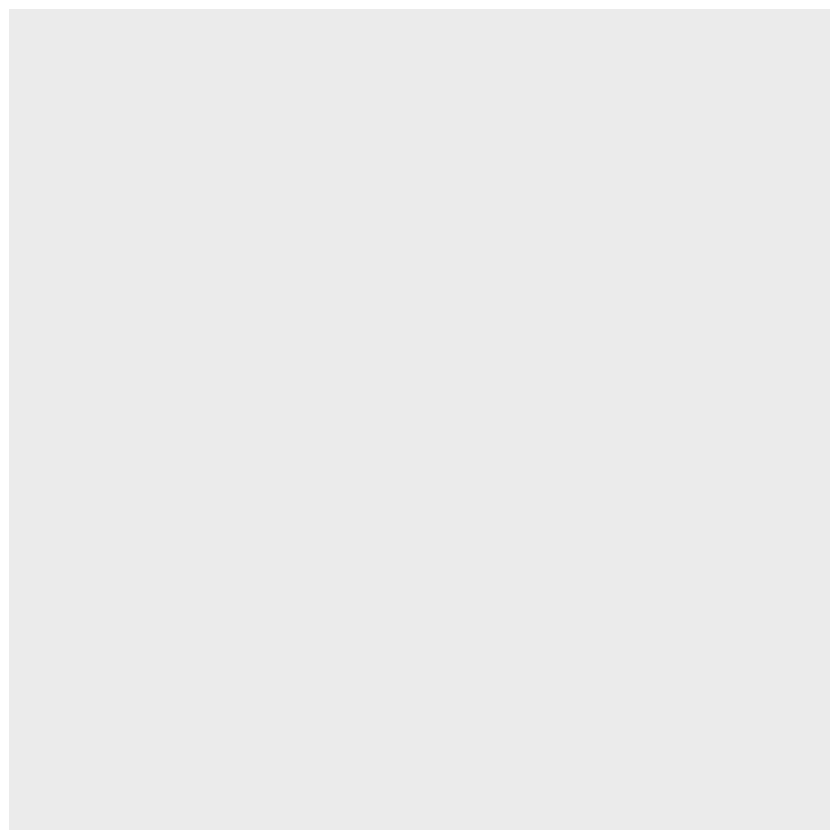

In [9]:
ggplot(data = mpg)

Only showing the ggplot coordinate system without any layers. So it is an empty graph.

***How many rows are in mtcars? How many columns?***

In [11]:
nrow(mpg)
ncol(mpg)

[1] 234

[1] 11

***What does the drv variable describe? Read the help for ?mpg to find out.***

f = front-wheel drive, r = rear wheel drive, 4 = 4wd

***Make a scatterplot of hwy versus cyl.***

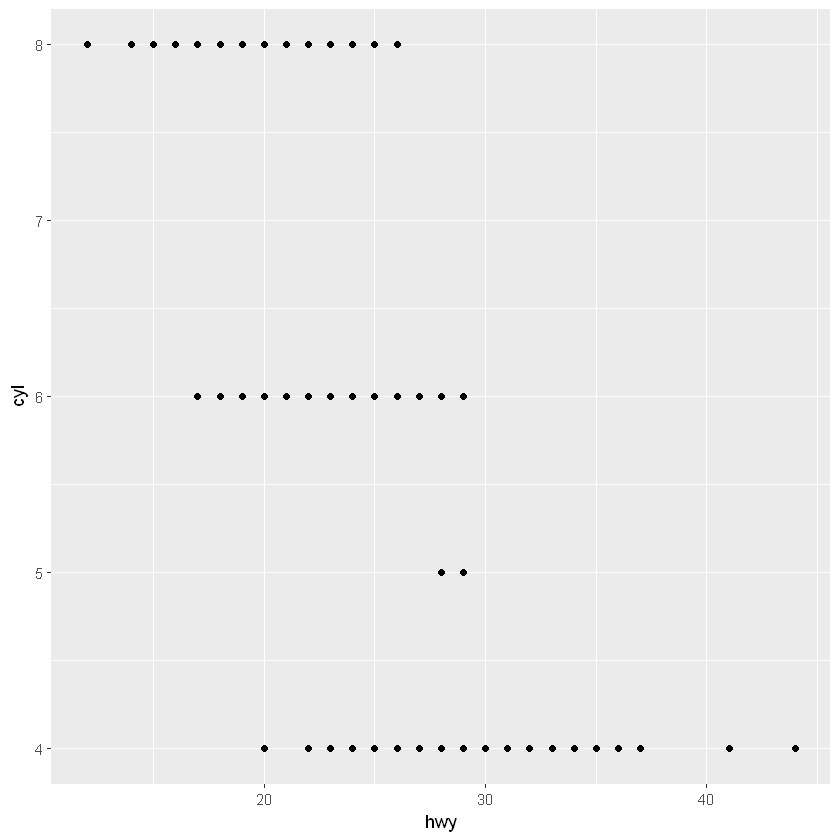

In [13]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = hwy, y = cyl))

***What happens if you make a scatterplot of class versus drv? Why is the plot not useful?***

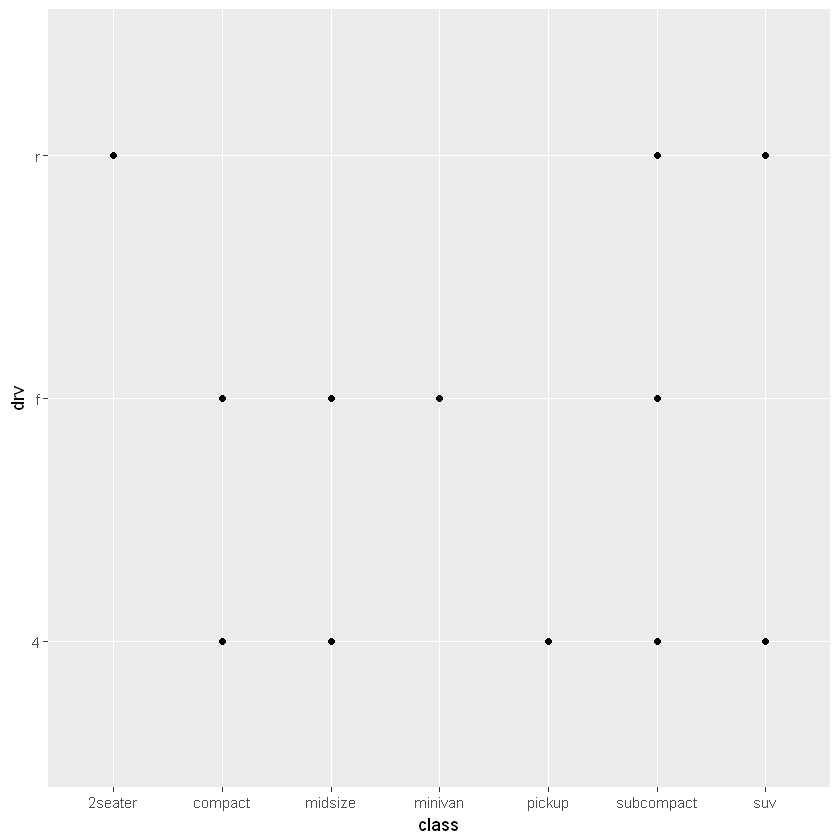

In [14]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = class, y = drv))

***What’s gone wrong with this code? Why are the points not blue? ***

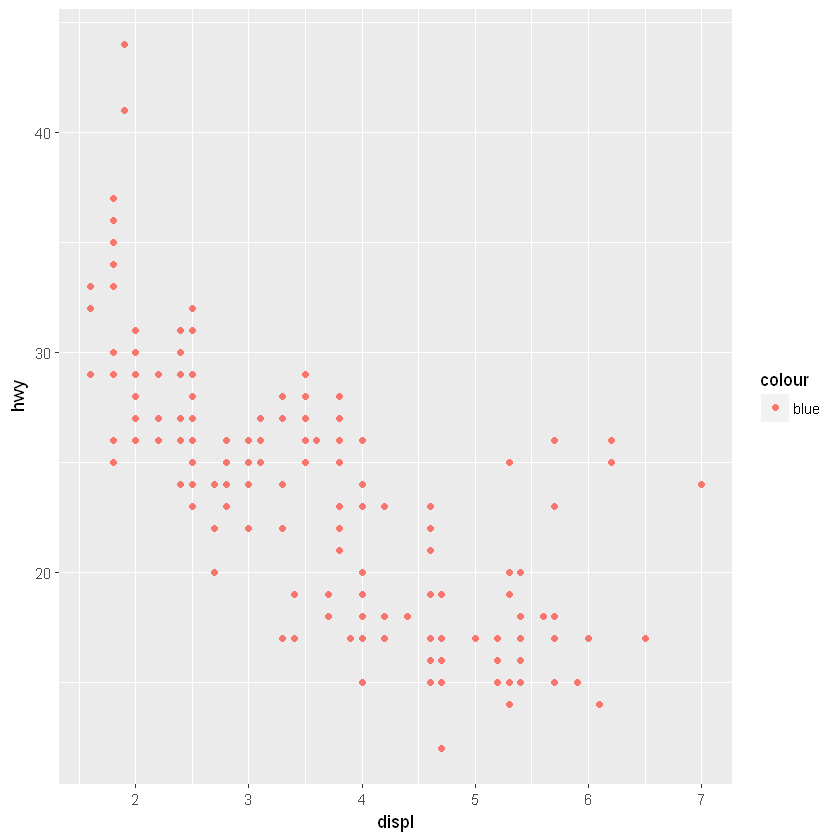

In [15]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = "blue")
  )

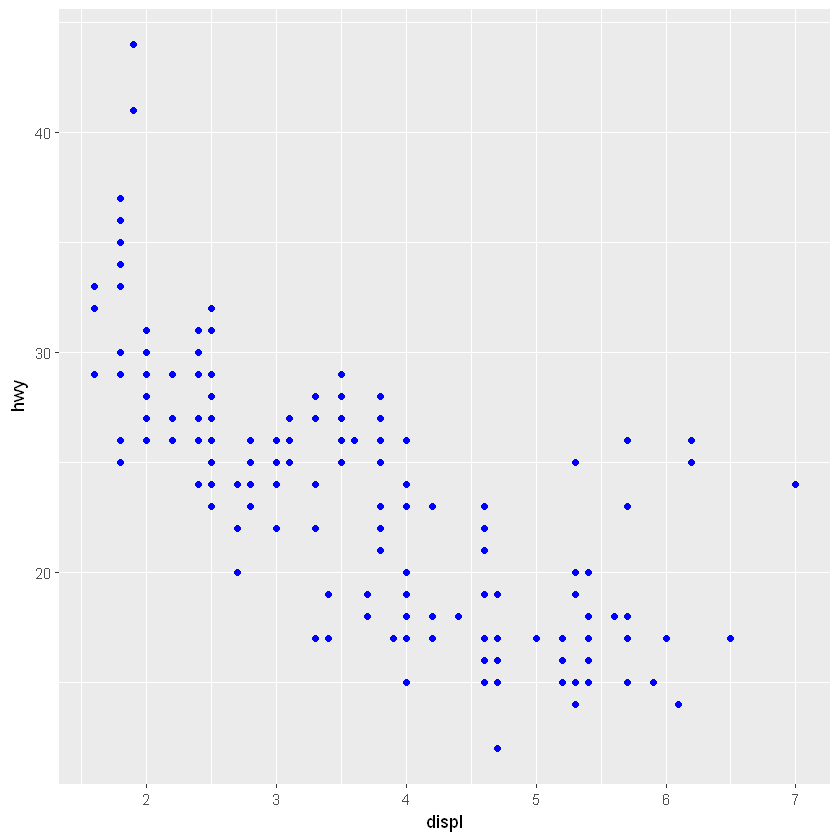

In [16]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy), color = "blue"
  )

To set the aesthetic to blue manually it need to be set name as an argument of your geom function, so it needs to go outside of aes().

***Which variables in mpg are categorical?
Which variables are continuous? (Hint: type ?mpg to read the documentation for the dataset.)
How can you see this information when you run mpg?***

In [20]:
str(mpg)

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


***Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical versus continuous variables?***

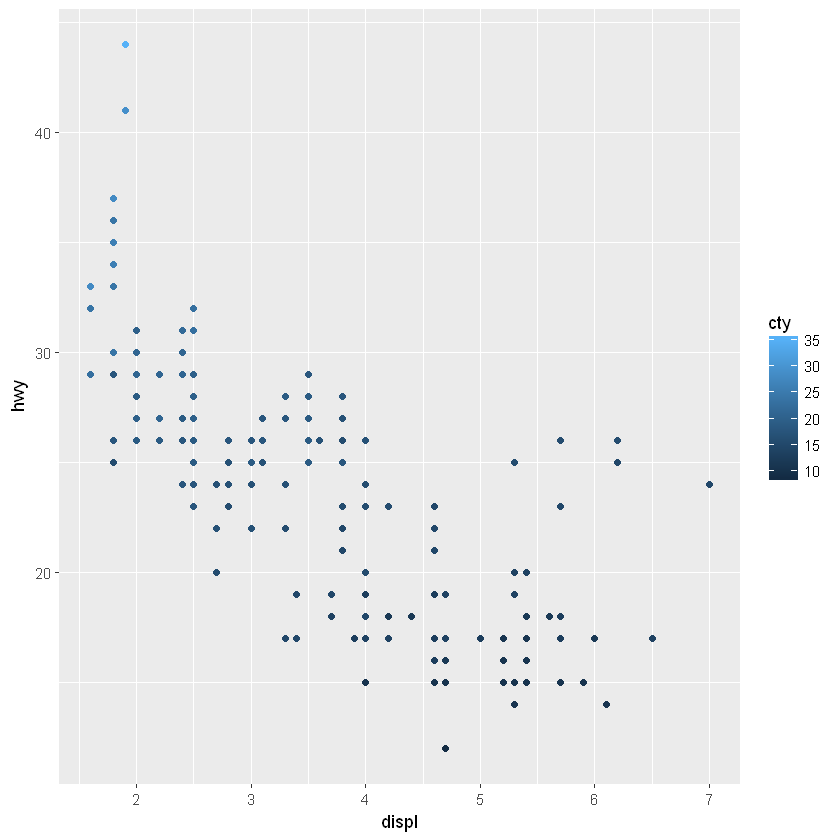

In [25]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = cty)
  )
# A continuous variable can not be mapped to shape

***What happens if you map the same variable to multiple aesthetics?***

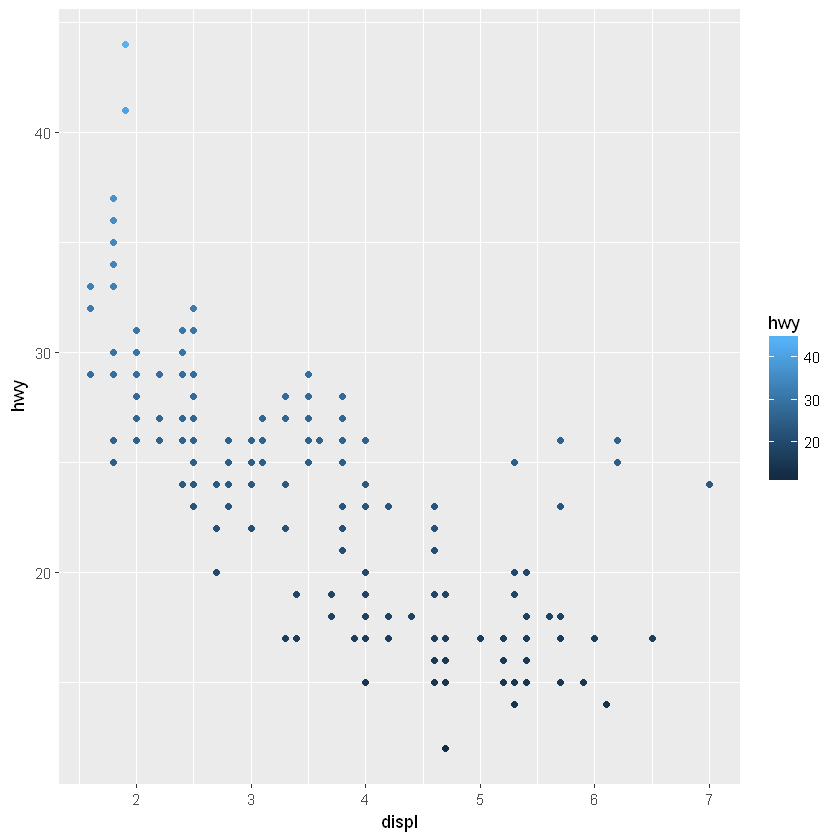

In [26]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = hwy)
  )

***What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point.)***

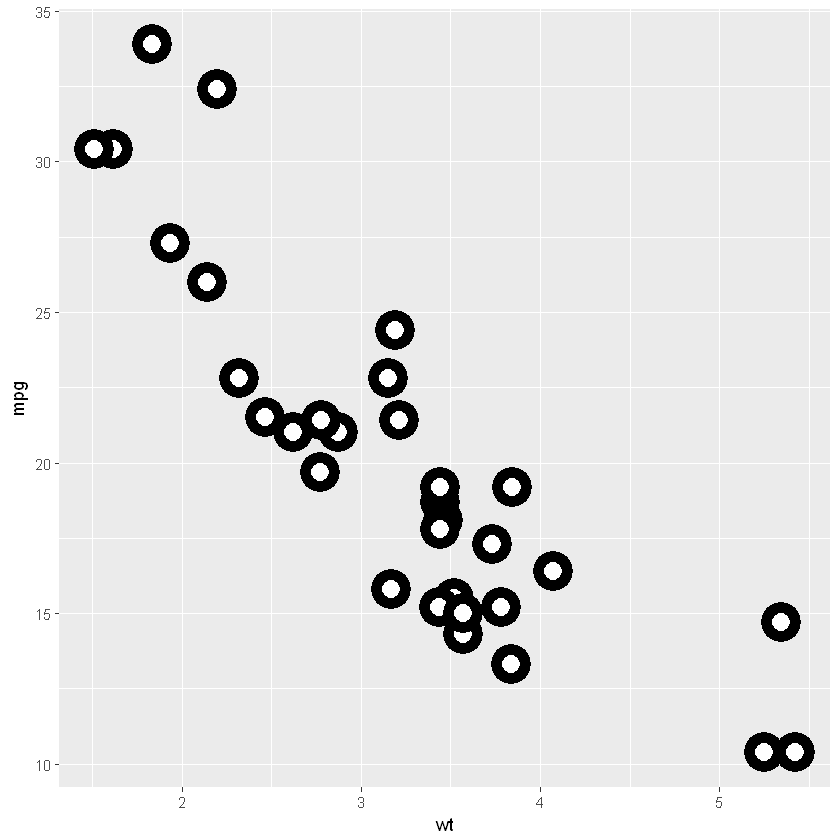

In [28]:
# For shapes that have a border (like 21), you can colour the inside and
# outside separately. Use the stroke aesthetic to modify the width of the
# border
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(shape = 21, colour = "black", fill = "white", size = 5, stroke = 5)

***What happens if you map an aesthetic to something other than a variable name, like aes(color = displ < 5)?***

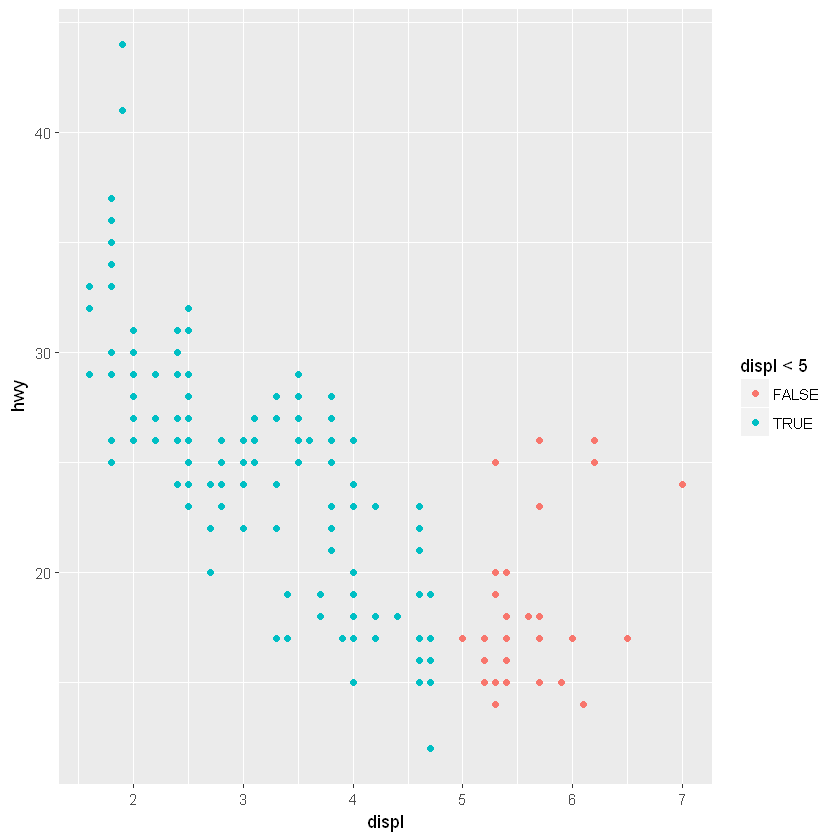

In [29]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = displ < 5)
  )

## Facets
Subplots that each display one subset of the data
<br>facet_wrap() - To facet your plot by a single variable
<br>facet_grid() - To facet your plot on the combination of two variables

**What happens if you facet on a continuous variable?**

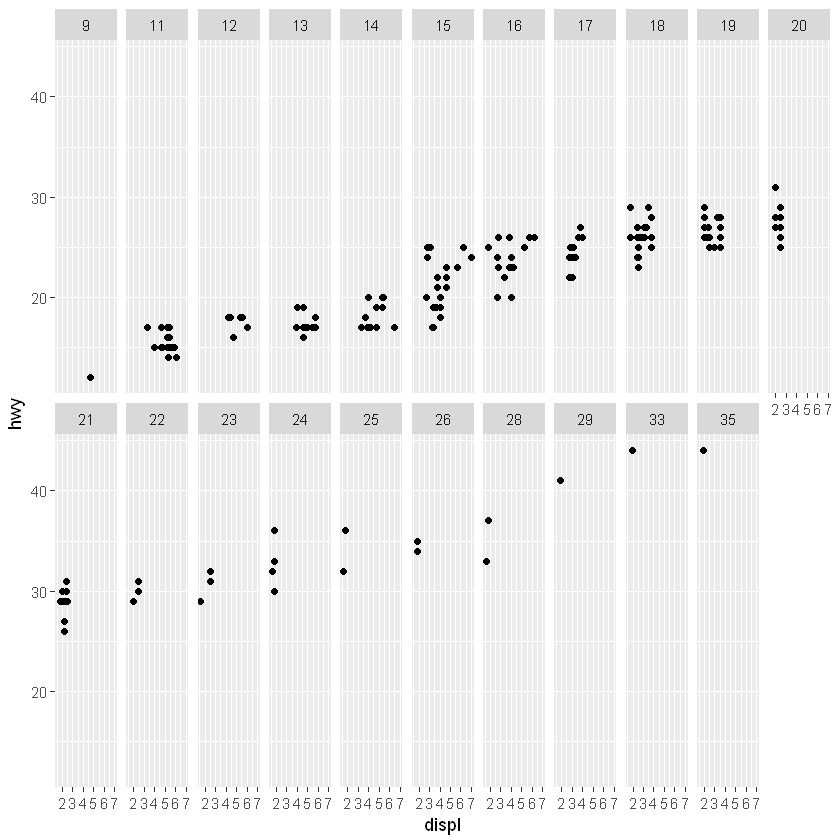

In [31]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ cty, nrow = 2)

**What do the empty cells in a plot with facet_grid(drv ~ cyl) mean? How do they relate to this plot?**
<br>There are no data for this combination

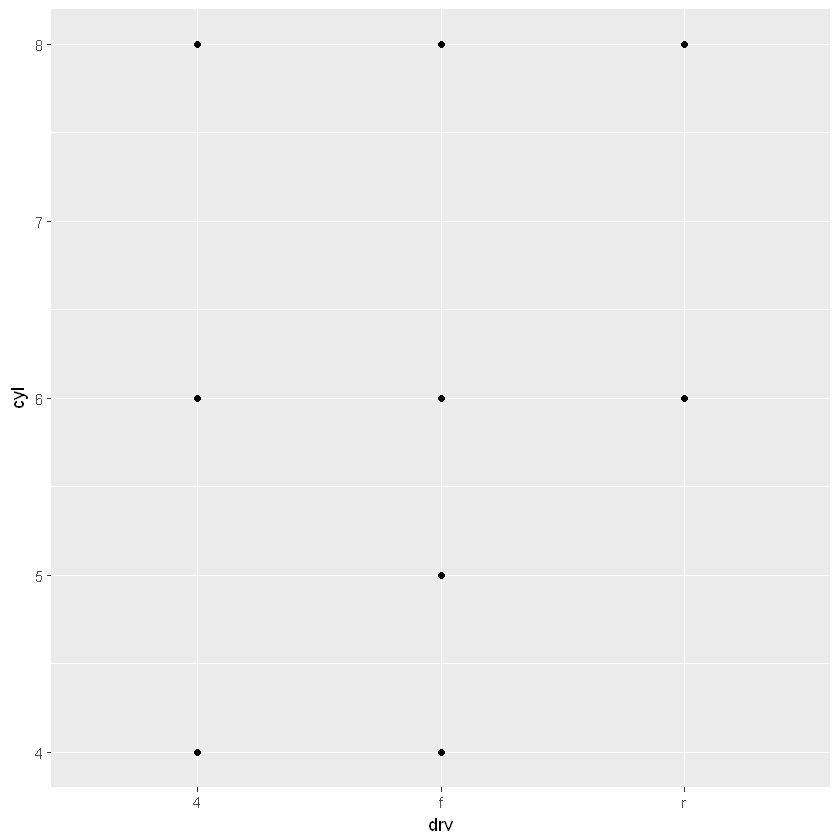

In [34]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = drv, y = cyl))

**What plots does the following code make? What does . do?**
<br>drv ~ . - facets the drv variable into rows
<br>. ~ cyl - facets the cyl variable into columns

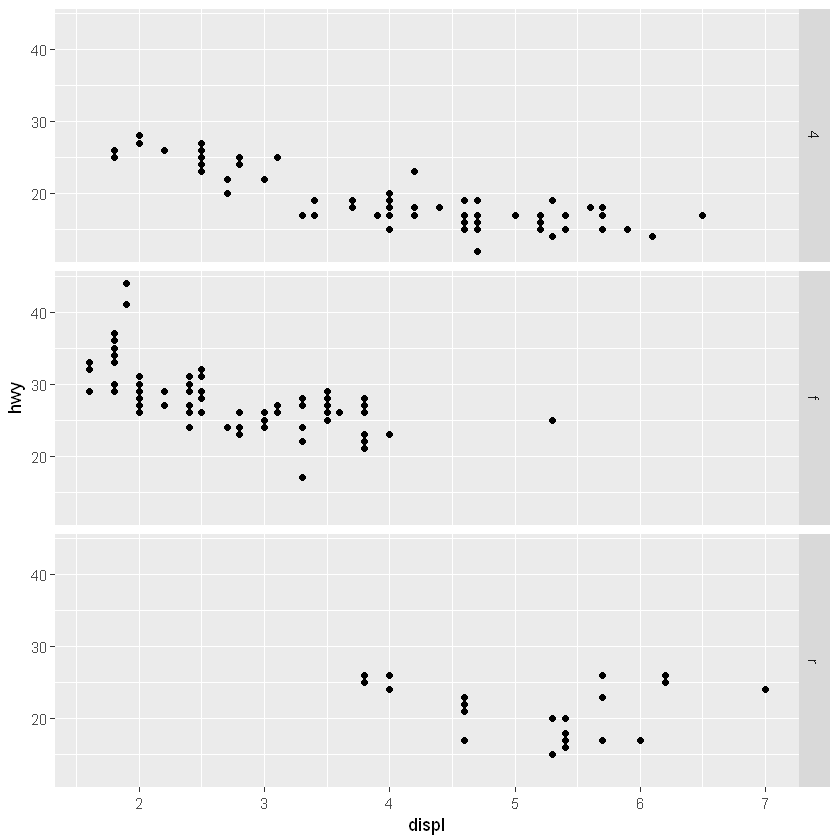

In [35]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

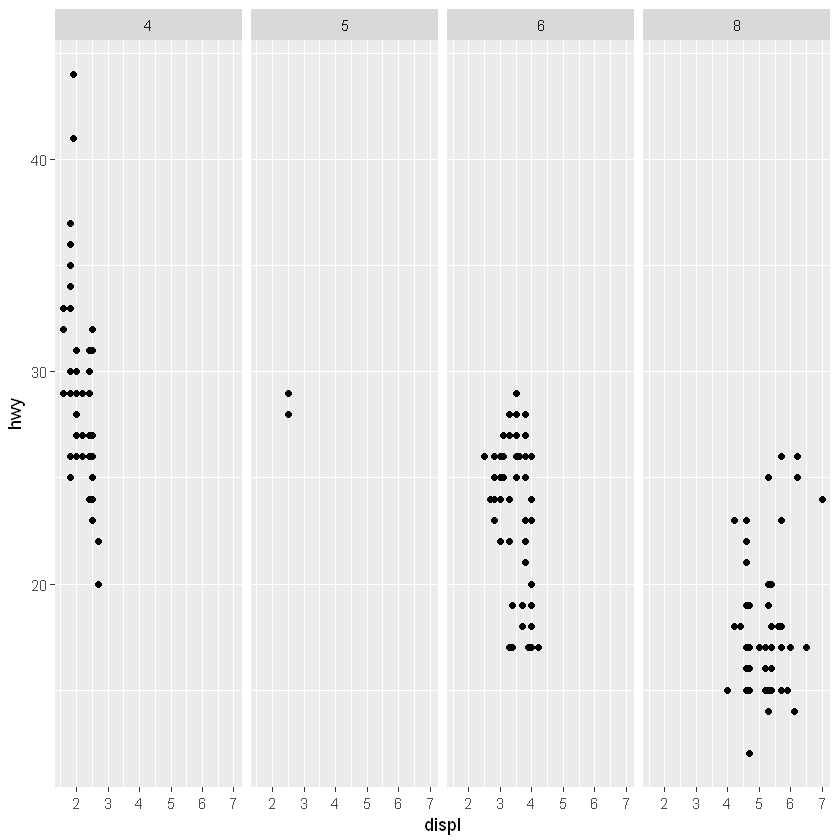

In [36]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)

**Take the first faceted plot in this section:
<br>What are the advantages to using faceting instead of the color aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?**
<br>The color aesthetic shows the data all together easier to compare with small datasets. With a lot of variables faceting would better visualise specific differences that maybe the color getting to similar to each other and hard to differentiate. Also overlying datapoint can be seen in facets better than with colors.

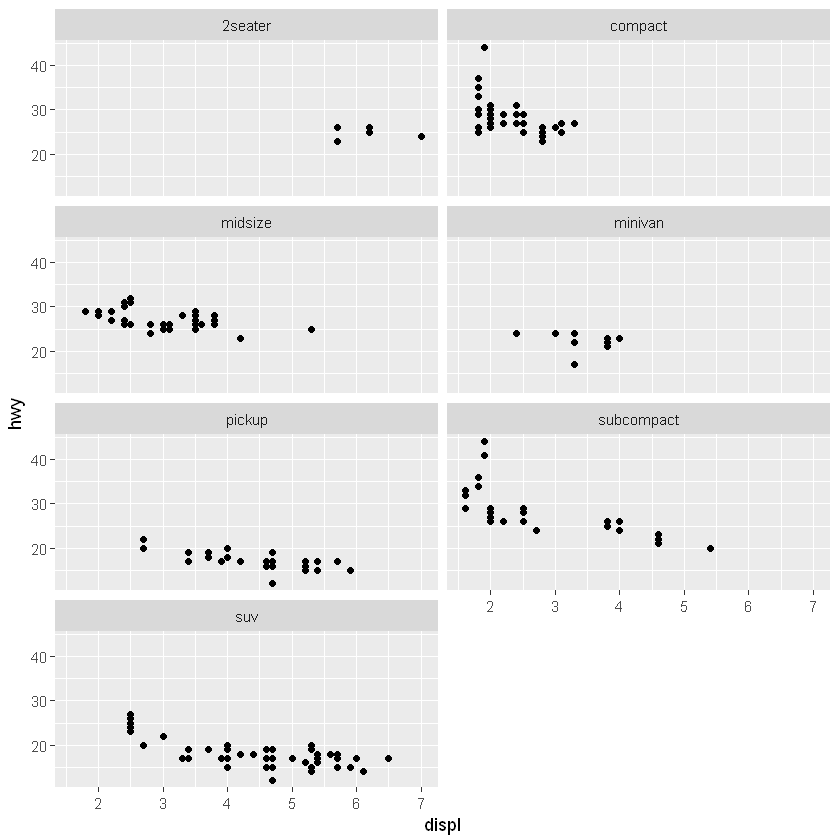

In [50]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 4)

**Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol variables?**
<br>nrow = number of rows the data should be visualised
<br>ncol = number of columns the data should be visualised
<br>dir = directtion horizontal or vertical
<br>facet_grip does not have this because it hast two variables and therefore these variables detemine of many colmns and rows

**When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?**